# ML3 Project - Machine Learning on Avocado Data Set

# Summarization of Learning

## 9 steps of EDA
1. Define Problem
2. Choose right tools
3. Collection of data
4. Pre-profile
5. Pre processing of data (Clean, remove unnecessary, add relevant data)
6. Post-profile
7. Ask right Questions
8. Conclusion or Summarization
9. Actionable Insights (low hanging fruits)


## 7 Stages of ML
1. Data Collection
2. Data Preparation
3. Choose Model
4. Train Model
5. Evaluate Model
6. Improve Model
7. Predict Model

# Introduction

## Problem Statement 

Avocado is a fruit consumed by people heavily in the United States.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailer's cash registers based on actual retail sales of Hass Avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects as per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

|ID|Feature|Description|
|:--|:--|:--|
|01|Date| The date of the observation| 
|02|AveragePrice| The average price of a single Avocado | 
|03|type| Conventional or organic| 
|04|year| The year|
|05|Region| The city or region of the observation |
|06|Total Volume| Total number of avocados sold|
|07|4046| Total number of avocados with PLU 4046 sold|
|08|4225| Total number of avocados with PLU 4225 sold|
|09|4770| Total number of avocados with PLU 4770 sold|

**Inspiration /Label**

Our task is to make a mode that can consider the data provided and predict the Average Price.

# Importing Packages

## Importing and Installing the packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)              # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)                 # To display all the data in each column
pd.set_option('display.precision', 5)                       # To display values only upto three decimal places.
pd.options.display.max_columns = 50                         # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format  
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)
from sklearn.preprocessing import LabelEncoder

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)                      # To apply seaborn styles to the plots.

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

from datetime import datetime, timedelta                     #for datetime, as we have a date column in this dataset

## Handling warnings

In [2]:
warnings.filterwarnings('ignore')                                                                           # ignore warnings.
%config IPCompleter.greedy = True                                                                      # autocomplete feature.
pd.options.display.max_rows = None                                        # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None                                  # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 4                                                 # set the precision of floating point numbers.

# Loading Data

## Description of Data

In [3]:
# Importing training dataset using pd.read_csv from github. Not saving the file locally 
df=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")

In [4]:
# to have a quick glance of data
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [5]:
#to identify null, missing data and the type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
#listing the column names, so it is easy to copy paste later during Train/test data
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# to find the shape of the data, though seen in the .info() , double checking here
df.shape

(18249, 14)

In [8]:
# to check for the null values. Already checked in .info(), double checking here
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
df.info(null_counts=True)                                 # Information about the data Columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
df.describe(include='all')              # Information about the data to describe the major attributes

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.00,18249,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249,18249.00,18249
unique,nan,169,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,54
top,nan,2015-01-18,nan,nan,nan,nan,nan,nan,nan,nan,nan,conventional,nan,Syracuse
freq,nan,108,nan,nan,nan,nan,nan,nan,nan,nan,nan,9126,nan,338
mean,24.23,NaN,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,NaN,2016.15,NaN
std,15.48,NaN,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,NaN,0.94,NaN
min,0.00,NaN,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2015.00,NaN
25%,10.00,NaN,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,NaN,2015.00,NaN
50%,24.00,NaN,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,NaN,2016.00,NaN
75%,38.00,NaN,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,NaN,2017.00,NaN


<span style='background:orange'> Observation: </span>
    
- There are 18249 rows and 14 columns 
- Therev are 2 Types of Avocados
- There are no missing values 
- There are 9 Float, 2 Integer and 3 Object columns

## Handling Duplciate Rows

In [11]:
df[df.duplicated(keep='first')].shape

(0, 14)

In [12]:
before_shape = df.shape
print('Data Shape [Before]:', before_shape)

df.drop_duplicates(inplace = True)

after_shape = df.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 2) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (18249, 14)
Data Shape [After]: (18249, 14)
Drop Ratio: 0.0 %


<span style='background:orange'> Observation: </span>
    
- There are no duplicate values

## Dropping Columns

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


## Convert Date column from Object to Datetime Type

In [15]:
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


In [17]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [18]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29


<span style='background:orange'> Observation: </span>
    
- We have converted "Date" column from Object to Datetime
- Also, converted the Date column to "Month" and "Day"

# EDA (Exploratory Data Analysis)

## Univaraiate Analysis

### All columns Histogram

In [19]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [20]:
# to display number of samples
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
0.98    189
1.19    188
1.36    187
1.59    186
0.99    185
1.48    185
1.43    185
1.23    181
1.14    180
1.49    180
1.03    179
1.05    178
1.40    175
1.17    174
1.04    174
1.54    173
1.44    172
1.50    170
1.06    170
1.25    170
1.11    169
1.07    168
1.16    168
1.09    167
1.00    167
1.41    167
1.22    167
1.24    165
1.34    164
1.35    163
1.55    163
1.10    161
1.52    161
1.02    160
1.53    160
1.47    160
1.37    159
1.33    159
1.60    159
1.01    159
1.12    158
1.45    157
1.27    155
1.20    155
1.38    155
1.21    151
1.56    151
1.46    150
1.42    149
1.29    149
1.51    148
1.39    148
0.97    147
1.28    147
1.58    146
0.96    143
1.66    141
0.93    141
1.30    140
1.62    139
1.31    139
1.68    138
1.32    137
1.63    136
1.57    134
1.64    133
1.67    129
0.95    127
1.69    127
1.61    125
1.82    125
1.65    123
0.94    123
1.81    119
1.72    117
1.80    116
1.83    115
1.70    115
1.76

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92ca126450>,
      dtype=object)

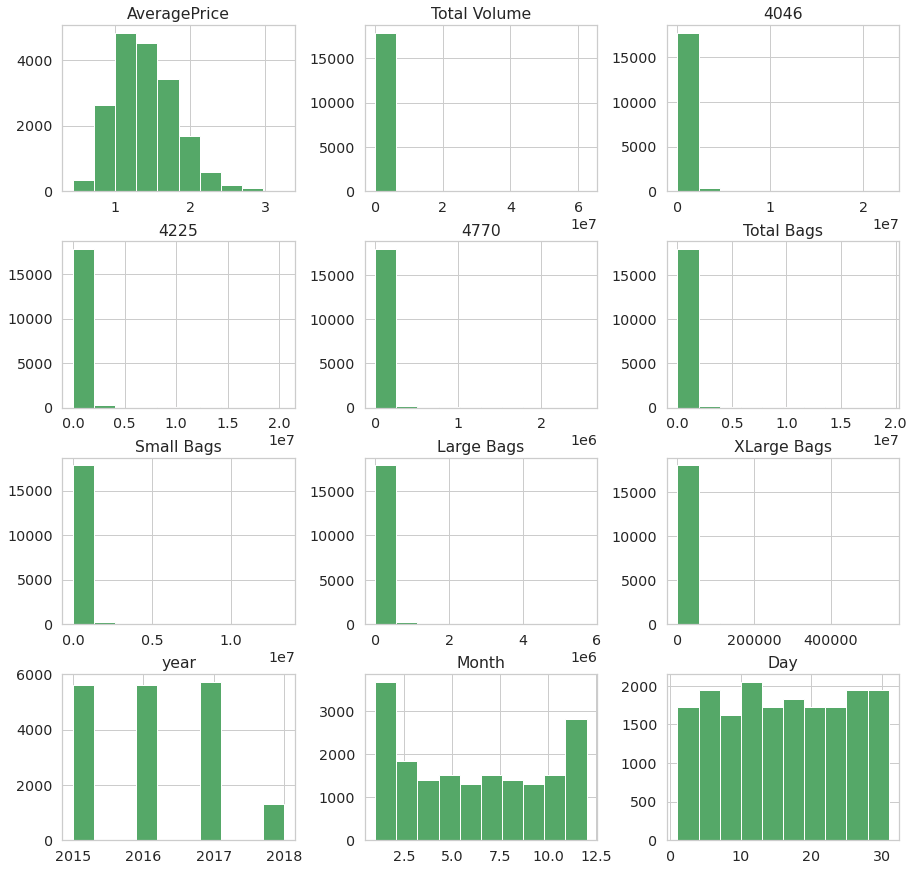

In [21]:
df.hist(figsize = (15,15),color='g')

<span style='background:orange'> Observation: </span>
 
- Average price column is normally distributed over the histogram

## Bivariate Analysis

In [22]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29


### Which year has Maximum Average Price

Text(0, 0.5, 'Average Price')

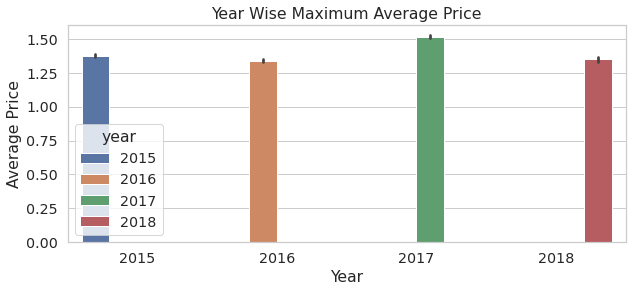

In [23]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=df['year'],y=df['AveragePrice'], hue=df.year)
plt.title('Year Wise Maximum Average Price')
plt.xlabel('Year')
plt.ylabel('Average Price')

<span style='background:orange'> Observation: </span>

- The Average Price was Maximum in 2017

### Which type of Avocados are more in demand (Year wise distribution)

Text(0, 0.5, 'Average Price')

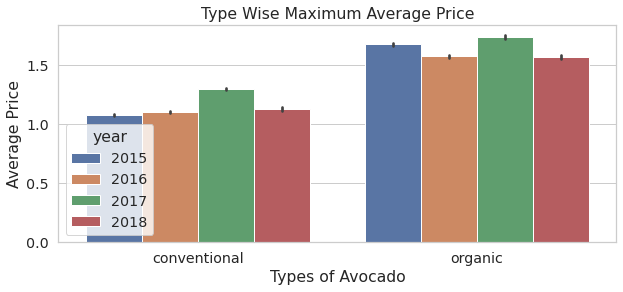

In [24]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=df['type'],y=df['AveragePrice'], hue=df.year)
plt.title('Type Wise Maximum Average Price')
plt.xlabel('Types of Avocado')
plt.ylabel('Average Price')

<span style='background:orange'> Observation: </span>

- We can see "Organic Avocado" has maximum Average Price in every year

### Which type of Avocados have maximum volume

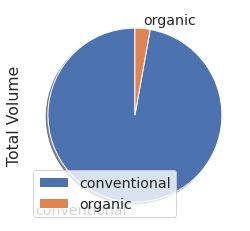

In [25]:
df.groupby(['type']).sum().plot(kind='pie', y='Total Volume', shadow = True, startangle=90)

<span style='background:orange'> Observation: </span>

- Here 0 = Conventional Avocado and 1 = Organic Avocado
- So looks like Conventional is in more demand

### Which type of Avocados have more Volume (Year wise distribution)

Text(0, 0.5, 'Total Volume')

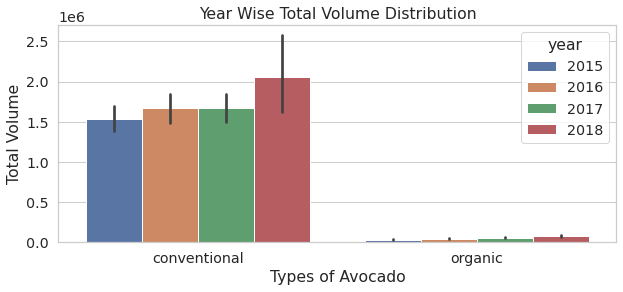

In [26]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=df['type'],y=df['Total Volume'], hue=df.year)
plt.title('Year Wise Total Volume Distribution')
plt.xlabel('Types of Avocado')
plt.ylabel('Total Volume')

<span style='background:orange'> Observation: </span>

- Conventional Avocado were sold more in each year

### Distribution of Average Price over the Months

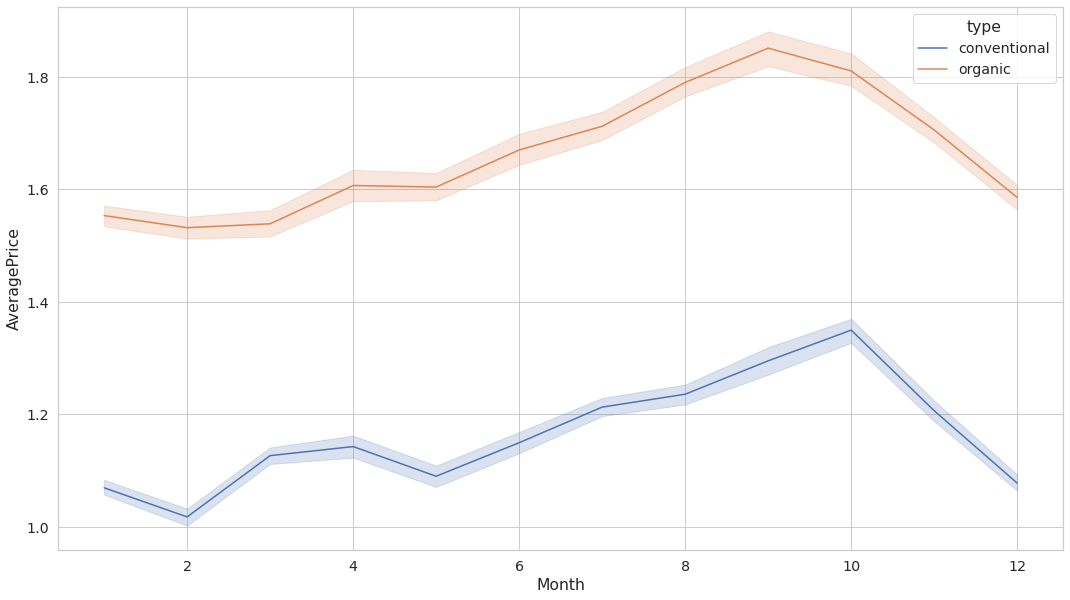

In [27]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

<span style='background:orange'> Observation: </span>

- There was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

###  How price is distributed over the date column

Text(0.5, 1.0, 'Timeline vs Average Price')

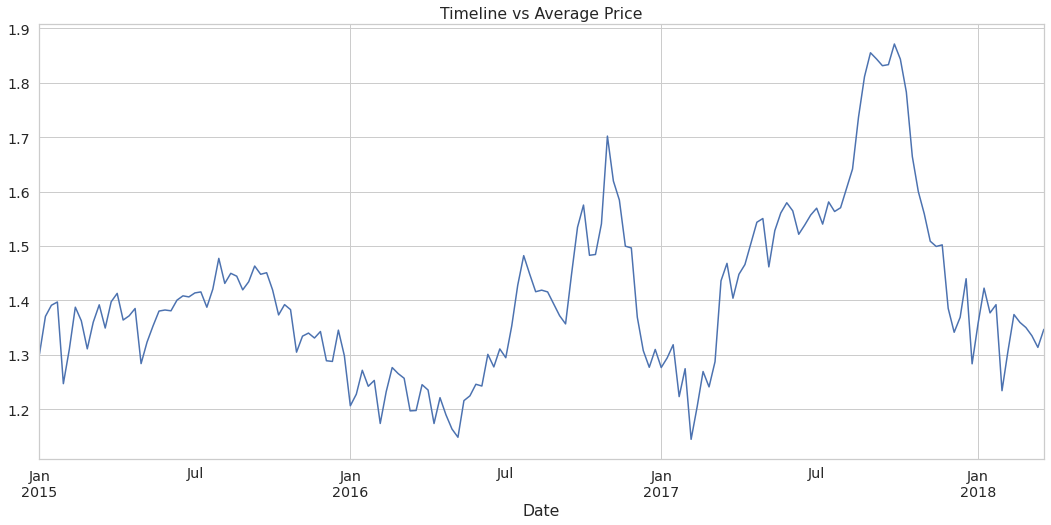

In [28]:
Timeline=df.groupby('Date').mean()
plt.figure(figsize=(18,8))
Timeline['AveragePrice'].plot()
plt.title('Timeline vs Average Price')

<span style='background:orange'> Observation: </span>

- This shows there was a huge hike in prices after July 2016 and before Jan 2018

### Year Wise Maximum Volume of Avocado Sold

Text(0, 0.5, 'Total Volume')

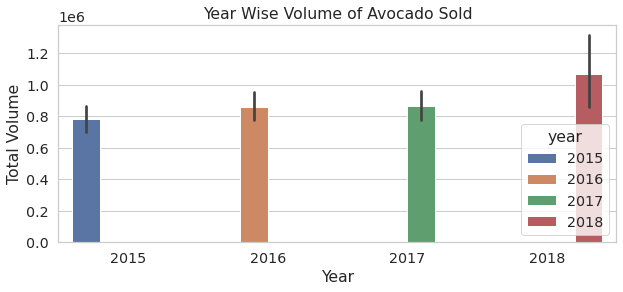

In [29]:
fig,ax =plt.subplots(figsize=(10,4))
sns.barplot(x=df['year'],y=df['Total Volume'], hue=df.year)
plt.title('Year Wise Volume of Avocado Sold')
plt.xlabel('Year')
plt.ylabel('Total Volume')

<span style='background:orange'> Observation: </span>

- The sell was maximum in 2018

### Which Region has Maximum Average Price

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

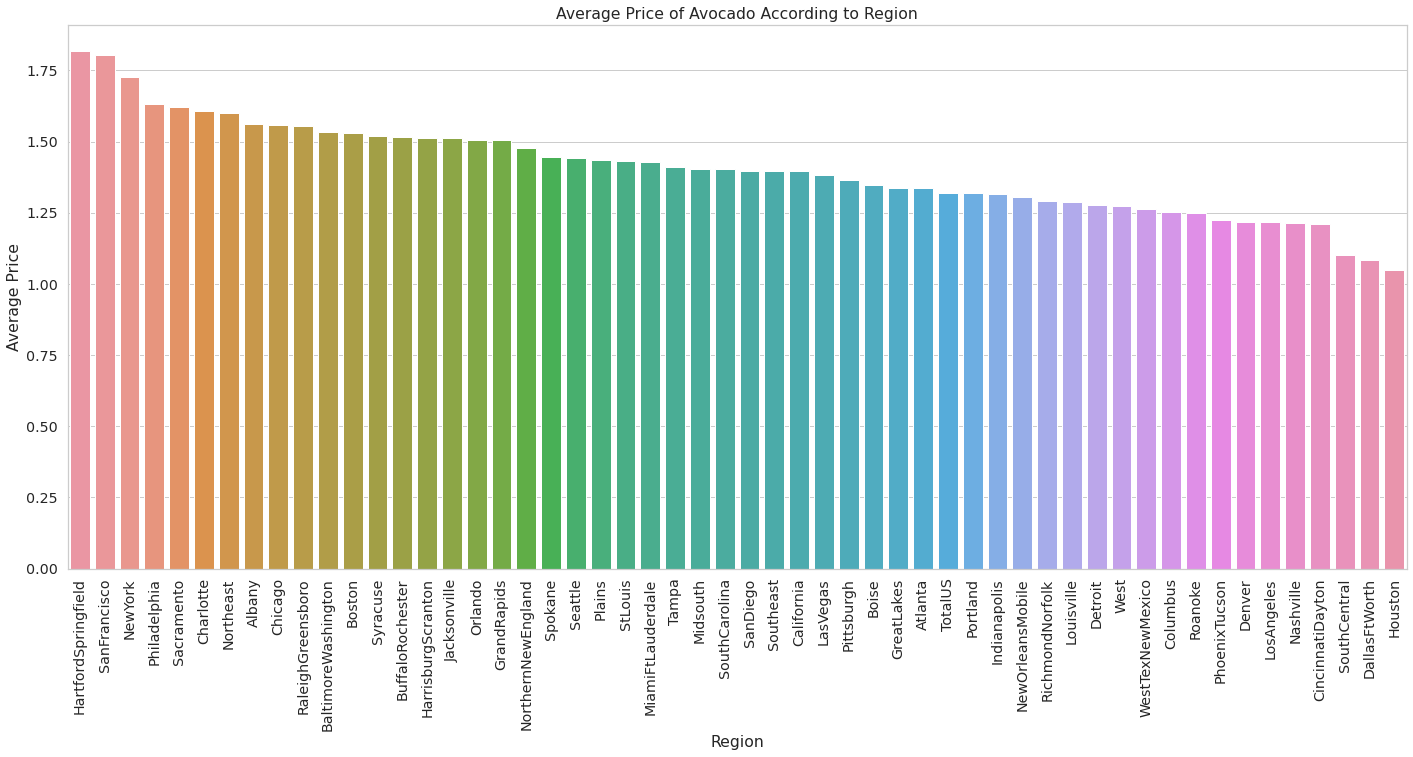

In [30]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

<span style='background:orange'> Observation: </span>

- The Regions are listed alphabetically
- Hartford Springfield has the maximum Average Price
- Houston has the minimum Average Price

### Which region has Highest Consumption

Text(0.5, 1.0, 'Average of Total Volume According to Region')

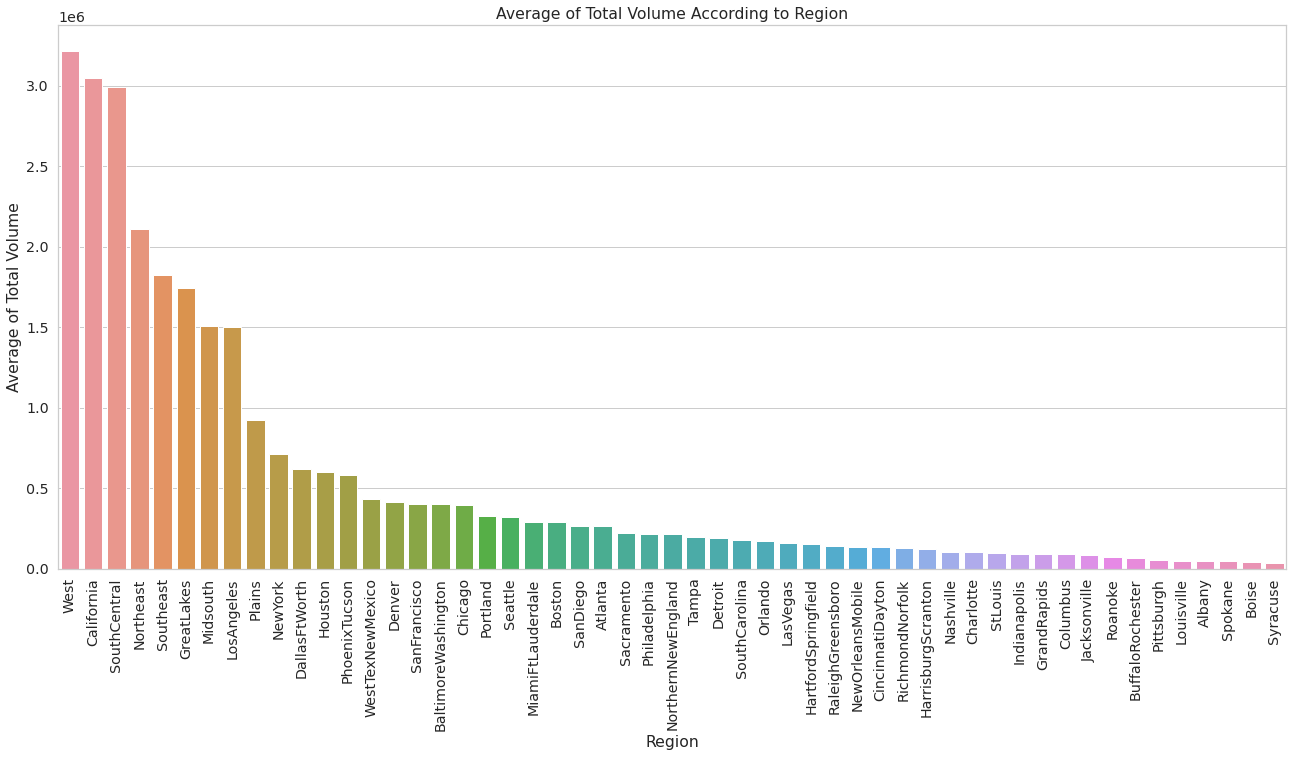

In [31]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

<span style='background:orange'> Observation: </span>

- West has the maximum Consumption
- Syracuse has the minimum Consumption

### In which year and for which region was the Average price the highest

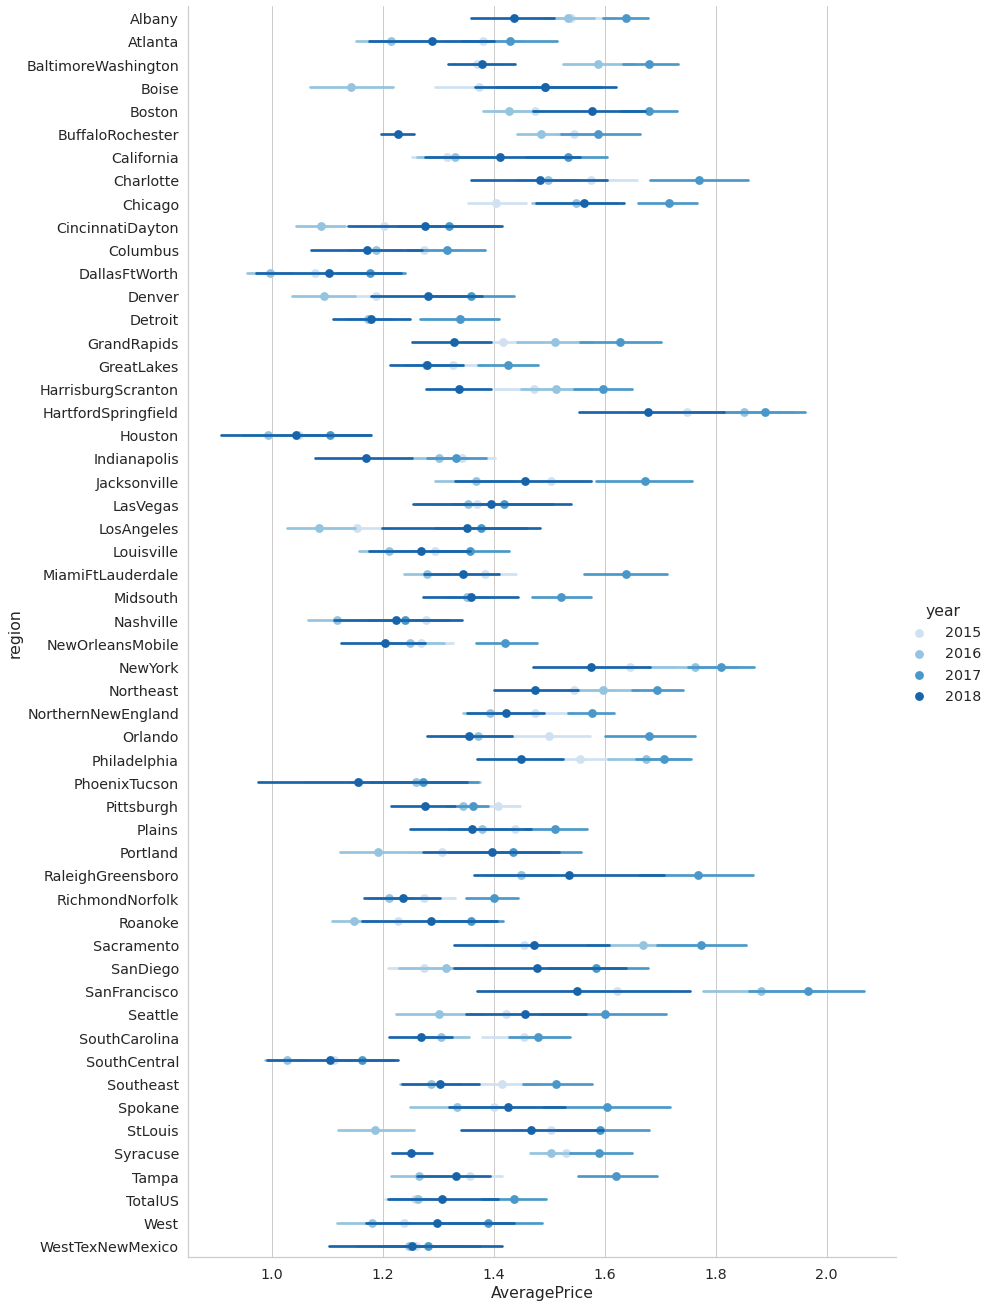

In [32]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

<span style='background:orange'> Observation: </span>

- There was a huge increase in Avocado prices in Year 2017 in SanFranciso region

### Variation of Average Price with Bag Size

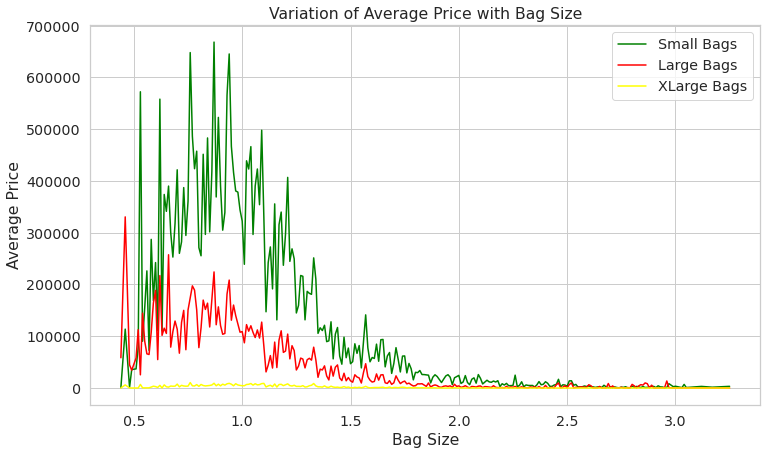

In [33]:
df.groupby(['AveragePrice'])['Small Bags'].mean().plot(kind='line', figsize=(12, 7), color='green')
df.groupby(['AveragePrice'])['Large Bags'].mean().plot(kind='line', figsize=(12, 7), color='red')
df.groupby(['AveragePrice'])['XLarge Bags'].mean().plot(kind='line', figsize=(12, 7), color='yellow')

plt.ylabel('Average Price')
plt.xlabel('Bag Size')
plt.title('Variation of Average Price with Bag Size')
plt.legend(['Small Bags', 'Large Bags', 'XLarge Bags'])

<span style='background:orange'> Observation: </span>

- Small Bags have maximum Average Price than XLarge Bags

## Multi Variate Analysis

### Correlation

In [34]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.00,-0.19,-0.21,-0.17,-0.18,-0.18,-0.17,-0.17,-0.12,0.09,0.16,0.03
Total Volume,-0.19,1.00,0.98,0.97,0.87,0.96,0.97,0.88,0.75,0.02,-0.02,-0.01
4046,-0.21,0.98,1.00,0.93,0.83,0.92,0.93,0.84,0.70,0.00,-0.03,-0.01
4225,-0.17,0.97,0.93,1.00,0.89,0.91,0.92,0.81,0.69,-0.01,-0.02,-0.01
4770,-0.18,0.87,0.83,0.89,1.00,0.79,0.80,0.70,0.68,-0.04,-0.03,-0.01
Total Bags,-0.18,0.96,0.92,0.91,0.79,1.00,0.99,0.94,0.80,0.07,-0.02,-0.00
Small Bags,-0.17,0.97,0.93,0.92,0.80,0.99,1.00,0.90,0.81,0.06,-0.02,-0.00
Large Bags,-0.17,0.88,0.84,0.81,0.70,0.94,0.90,1.00,0.71,0.09,-0.02,-0.01
XLarge Bags,-0.12,0.75,0.70,0.69,0.68,0.80,0.81,0.71,1.00,0.08,-0.01,0.00
year,0.09,0.02,0.00,-0.01,-0.04,0.07,0.06,0.09,0.08,1.00,-0.18,0.00


### Visual Form (Heatmap)

We can corelate the data using heatmap (visual form) and in a tabular form as well, to sort the data easily

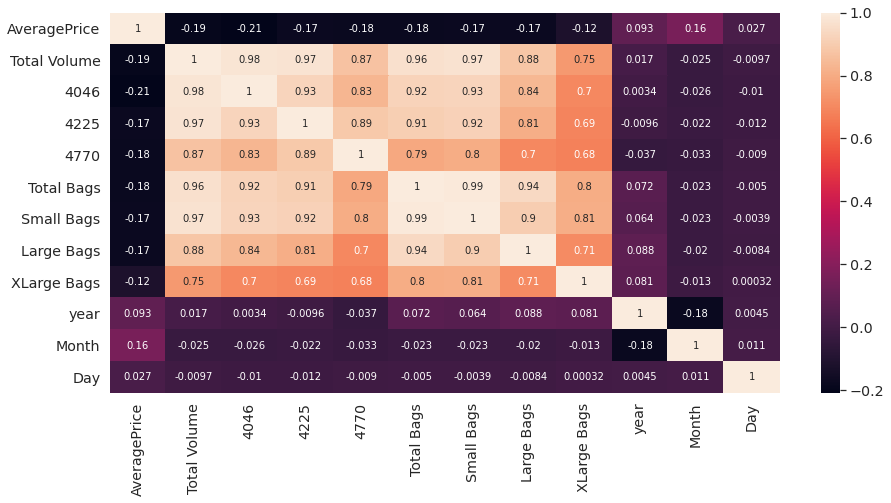

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [36]:
corr_matrix = df.corr()
corr_matrix["AveragePrice"].sort_values(ascending=True)

4046           -0.21
Total Volume   -0.19
4770           -0.18
Total Bags     -0.18
Small Bags     -0.17
Large Bags     -0.17
4225           -0.17
XLarge Bags    -0.12
Day             0.03
year            0.09
Month           0.16
AveragePrice    1.00
Name: AveragePrice, dtype: float64

### Tabular Form, to see the top co-relations more easily

In [37]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [38]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display_all(corrank(df))

,Feature1,Feature2,corr
0,Total Bags,Small Bags,0.99
1,Total Volume,4046,0.98
2,Total Volume,4225,0.97
3,Total Volume,Small Bags,0.97
4,Total Volume,Total Bags,0.96
5,Total Bags,Large Bags,0.94
6,4046,4225,0.93
7,4046,Small Bags,0.93
8,4046,Total Bags,0.92
9,4225,Small Bags,0.92


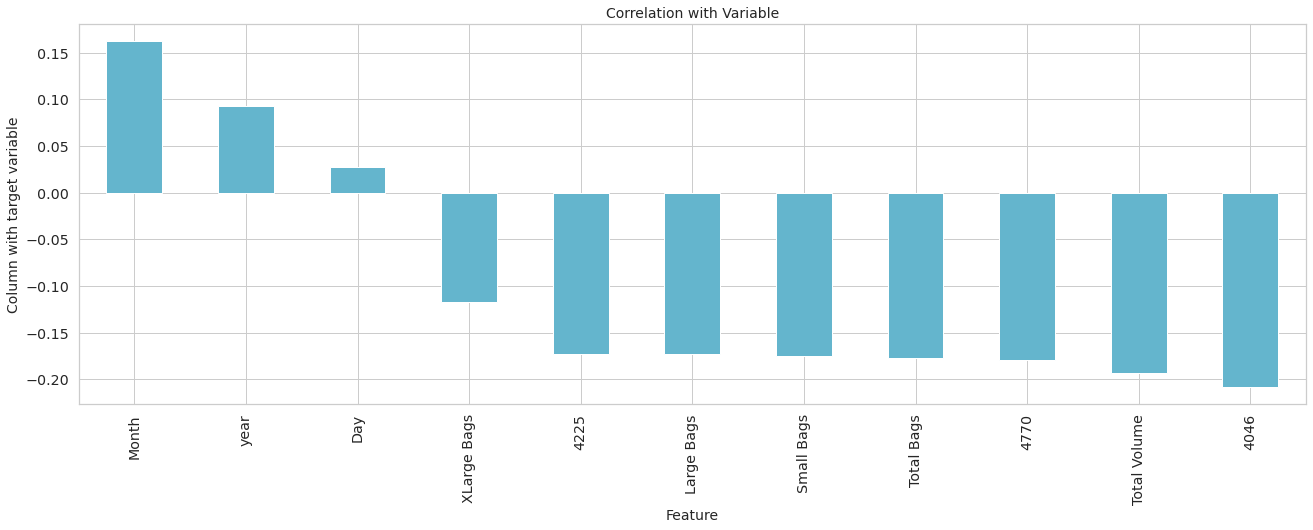

In [39]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind="bar",color='c')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target variable",fontsize=14)
plt.title("Correlation with Variable",fontsize=14)
plt.show()

<span style='background:orange'> Observation: </span>

- We have seen multiple ways to check the co-relation with the target varialbe
- The last graph makes it very clear that "Day" is close to 0 co-relation
- All the Features have positive or a negative co-relation 

## Label Encoding

We have to convert "regions", "type" and "year" columns to numerical form

In [40]:
le = LabelEncoder()
df["region"] = le.fit_transform(df["region"])

In [41]:
df['region'].value_counts().sort_index()

0     338
1     338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
25    338
26    338
27    338
28    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
53    335
Name: region, dtype: int64

In [42]:
df['year'].value_counts().sort_index()

2015    5615
2016    5616
2017    5722
2018    1296
Name: year, dtype: int64

In [43]:
le = LabelEncoder()
df["year"] = le.fit_transform(df["year"])

In [44]:
df['year'].value_counts().sort_index()

0    5615
1    5616
2    5722
3    1296
Name: year, dtype: int64

In [45]:
df['type'].value_counts().sort_index()

conventional    9126
organic         9123
Name: type, dtype: int64

In [46]:
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

In [47]:
df['type'].value_counts().sort_index()

0    9126
1    9123
Name: type, dtype: int64

<span style='background:orange'> Observation: </span>

- We have converted Regions to numerical form. Applied label encoding.
- We have converted Year to numerical form. Applied label encoding. Now, 2015 is 0, 2016 is 1, 2017 is 2 and 2018 is 3
- Also, converted Type to numerical form

## Dropping Date, Month and Day Column

Now, we will remove Date, Month and Day column

In [48]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,0,11,29


In [49]:
df.drop(["Date", "Month", "Day"],axis=1, inplace=True)

In [50]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,0


<span style='background:orange'> Observation: </span>

- We have removed Date, Month and Day column

## Handling Outlier

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

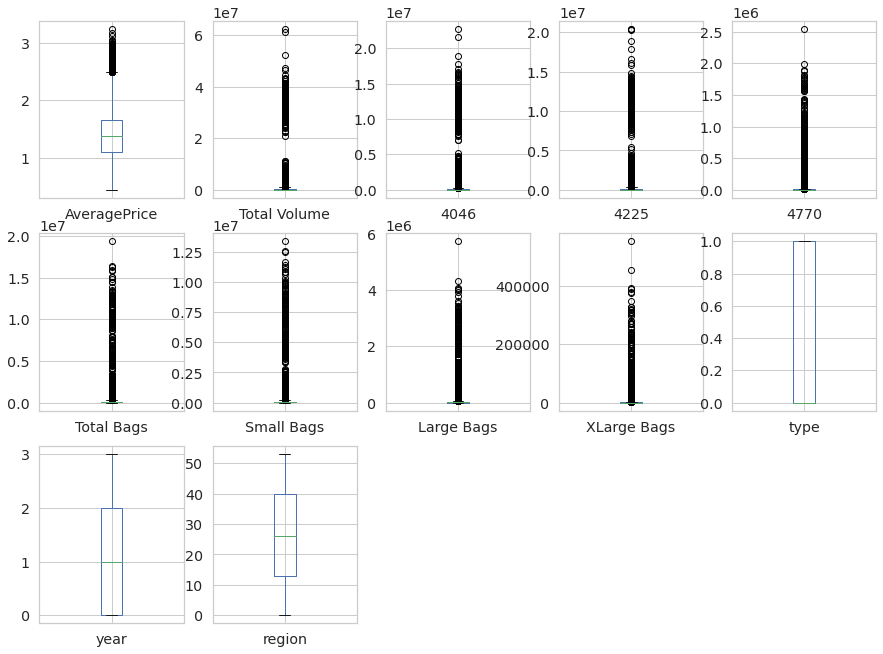

In [51]:
# Plotting the Boxplot for each column to check the outlier
df.plot(kind="box", subplots= True, layout= (4,5), figsize= (15,15))

<span style='background:orange'> Observation: </span>

- From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
- The second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, Zscore values.

In [52]:
#abs is absolute value
#df [condition], whatever condition it matches, it retains and others are removed
#here z score <3, it is retained and Z> 3 is removed
from scipy.stats import zscore

In [53]:
z = np.abs(zscore(df))
print(z)

[[0.18868864 0.22771641 0.23081597 ... 0.99983562 1.22128204 1.7002522 ]
 [0.13901962 0.23042664 0.23110251 ... 0.99983562 1.22128204 1.7002522 ]
 [1.18206895 0.21208462 0.23100731 ... 0.99983562 1.22128204 1.7002522 ]
 ...
 [1.15237477 0.24233073 0.2306933  ... 1.00016441 1.97050371 1.70081131]
 [1.30138182 0.24162464 0.2304279  ... 1.00016441 1.97050371 1.70081131]
 [0.53151208 0.24125273 0.22934712 ... 1.00016441 1.97050371 1.70081131]]


In [54]:
threshold= 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248]), array([ 0,  1,  2, ...,  9, 10, 11]))
(18249, 12)


In [55]:
# Assigning the value to df_new which are less the threshold value and removing the outliers
df_new = df[(z<3).all(axis = 1)]

In [56]:
print(df.shape)
print(df_new.shape)
df = df_new
print("Shape after removing outlier", df.shape)

(18249, 12)
(17651, 12)
Shape after removing outlier (17651, 12)


<span style='background:orange'> Observation: </span>

- We find the zscore value and then we have decided to make one threshold value as 3 which is standard of industry recommend value
- We removed all the outliers which zscore value is greater than 3
- After removing the outlier finaily there are 17651 rows and 12 columns presents in the data set.

## Skewness

In [57]:
df_new.skew()

AveragePrice    0.38
Total Volume    3.77
4046            4.91
4225            4.46
4770            5.12
Total Bags      4.07
Small Bags      4.22
Large Bags      5.05
XLarge Bags     6.14
type           -0.04
year            0.23
region          0.01
dtype: float64

In [58]:
print("Number of numerical columns: ",len(df_new.skew()))
print("Number of columns which are skewed not in -0.5 to +0.5 range: ",len(df_new.skew().loc[abs(df_new.skew())>0.5]))

Number of numerical columns:  12
Number of columns which are skewed not in -0.5 to +0.5 range:  8


**Note:** Before handling skewness lets remove our target column(y)

In [59]:
toskew_df2=df_new.drop(columns=["AveragePrice"])
y=df_new[["AveragePrice"]]

In [60]:

#lets treat the skewness in the X datset, for which skewness is present
import numpy as np
for index in toskew_df2.skew().index:
    if toskew_df2.skew().loc[index]>0.5:
        toskew_df2[index]=np.log1p(toskew_df2[index])
    if toskew_df2.skew().loc[index]<-0.5:
        toskew_df2[index]=np.square(toskew_df2[index])

In [61]:
#lets again check, how many columns are still skewed
print("Number of numerical columns: ",len(toskew_df2.skew()))
print("Number of columns which are skewed not in -0.5 to +0.5 range: ",len(toskew_df2.skew().loc[abs(toskew_df2.skew())>0.5]))

Number of numerical columns:  11
Number of columns which are skewed not in -0.5 to +0.5 range:  1


In [62]:
toskew_df2.skew()

Total Volume   -0.05
4046           -0.42
4225            0.10
4770            0.07
Total Bags     -0.38
Small Bags      0.06
Large Bags      0.27
XLarge Bags     1.22
type           -0.04
year            0.23
region          0.01
dtype: float64

<span style='background:orange'> Observation: </span>

- We first calculated the skew value and some of the column skew value are far from zero
- The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero
- In the last cell I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero
- Making the skewness value near to zero will help to get better score

## Standard Scalar

I am using the standard scaling method on x variable

In [63]:
toskew_df2.describe()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00
mean,11.21,8.85,101.97,4.88,10.08,98.12,62.74,2.06,0.51,1.14,26.10
std,2.18,3.25,50.06,4.02,2.14,43.62,45.80,3.29,0.50,0.94,15.40
min,4.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.27,6.71,63.51,0.00,8.51,62.70,22.40,0.00,0.00,0.00,13.00
50%,11.52,8.96,103.89,5.11,10.53,102.17,60.90,0.00,1.00,1.00,26.00
75%,12.88,11.50,138.44,8.57,11.53,127.00,97.16,4.31,1.00,2.00,39.00
max,15.94,15.22,230.29,12.75,14.84,215.19,184.12,10.93,1.00,3.00,53.00


In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(toskew_df2)
x=sc.transform(toskew_df2)
x=pd.DataFrame(toskew_df2)

In [65]:
x.describe()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00,17651.00
mean,11.21,8.85,101.97,4.88,10.08,98.12,62.74,2.06,0.51,1.14,26.10
std,2.18,3.25,50.06,4.02,2.14,43.62,45.80,3.29,0.50,0.94,15.40
min,4.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.27,6.71,63.51,0.00,8.51,62.70,22.40,0.00,0.00,0.00,13.00
50%,11.52,8.96,103.89,5.11,10.53,102.17,60.90,0.00,1.00,1.00,26.00
75%,12.88,11.50,138.44,8.57,11.53,127.00,97.16,4.31,1.00,2.00,39.00
max,15.94,15.22,230.29,12.75,14.84,215.19,184.12,10.93,1.00,3.00,53.00


# Machine Learning (Model Building)

## Importing Libraries

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [67]:
#Since we installed tabulate thru pip install. Now will re-running the notebook, we dont want to install again
#so commenting out the pip statement
!pip install tabulate

In [68]:
from tabulate import tabulate

## Train & Test Data

<span style='background:orange'>   We create a list of the Features and Target Variable (AveragePrice) </span>

In [69]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,0


In [70]:
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']        
target = ['AveragePrice']

In [71]:
df[features]

Output hidden; open in https://colab.research.google.com to view.

In [72]:
df[target]

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
5,1.26
6,0.99
7,0.98
8,1.02
9,1.07


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

In [75]:
x_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17565,10464.29,1845.14,2819.17,0.00,5799.98,5796.65,3.33,0.00,1,2,53
10533,2211.53,294.65,0.00,0.00,1916.88,1916.88,0.00,0.00,1,0,27
7881,632537.90,180896.63,358599.04,5732.43,87309.80,85552.16,67.78,1689.86,0,2,42
8252,75253.52,2542.88,40061.88,8.00,32640.76,22629.71,10011.05,0.00,0,2,49
3835,195373.94,10457.51,103261.69,23242.76,58411.98,26546.73,27197.40,4667.85,0,1,19


In [76]:
y_train.head()

,AveragePrice
17565,2.36
10533,1.35
7881,1.79
8252,1.60
3835,0.99


In [77]:
x_test.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
612,1333424.37,925527.04,297656.40,11678.42,98562.51,88559.01,9991.57,11.93,0,0,11
16790,10361.33,597.65,5030.44,184.19,4549.05,3554.80,994.25,0.00,1,2,38
2851,87822.43,805.41,72159.95,63.13,14793.94,13739.89,1054.05,0.00,0,1,0
4956,550756.68,186260.68,164050.31,12126.32,188319.37,177175.95,10942.03,201.39,0,1,41
16615,64189.39,1398.68,24463.43,114.98,38212.30,28827.29,9385.01,0.00,1,2,35


In [78]:
y_test.head()

,AveragePrice
612,0.67
16790,1.77
2851,1.26
4956,1.06
16615,1.92


## Finding best Random state

In [79]:
maxAccu=0
BestRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)    
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        BestRs=i
print("Best accuracy is ", maxAccu,"on Random_state  ",BestRs)

Best accuracy is  0.5439270371105505 on Random_state   5


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=BestRs)

print('Train cases as below')
print('x_train shape : ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('***************************')
print('Test cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape :  (14120, 11)
y_train shape:  (14120, 1)
***************************
Test cases as below
x_test shape:  (3531, 11)
y_test shape:  (3531, 1)


In [81]:
lm=LinearRegression()
ridge = Ridge()
gb= GradientBoostingRegressor()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()
knn = KNeighborsRegressor()
ls=Lasso()
svr=SVR()

## Model Building and Finding Difference of Cross Validation from R2 & RMSE

In [82]:
modelList=[("Linear Regression", lm), ("Lasso",ls),("Ridge", ridge),("Gradient boosting",gb),("Decision Tree", dt),("Random Forest",rf),("Kneighbor",knn)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=BestRs)
    modelerror=[]
    ModelName= []
    modelR2=[]
    modelMAE=[]
    modelMSE=[]
    modelRMSE=[]
    modelCrossval=[]
    R2CVDiff=[]
    modelCrossval1=[]
    RMSECVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        error=modelInstance.score(x_train,y_train)
        modelerror.append(error)
        r2=r2_score(y_test,pred)
        modelR2.append(r2)
        mae = mean_absolute_error(y_test,pred)
        modelMAE.append(mae)
        MSE=mean_squared_error(y_test,pred)
        modelMSE.append(MSE)
        RMSE=sqrt(mean_squared_error(y_test,pred))
        modelRMSE.append(RMSE)
        
        crossAcc=cross_val_score(modelInstance,x,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='r2').mean()
        crossAcc1=cross_val_score(modelInstance,x,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='neg_root_mean_squared_error').mean()
        modelCrossval.append(crossAcc)
        R2CVDiff.append(r2-crossAcc)
        modelCrossval1.append(crossAcc1)
        RMSECVDiff.append(RMSE-crossAcc1)
        
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Error":modelerror,
                         "R2": modelR2,
                         "MAE": modelMAE,
                         "MSE": modelMSE,
                         "RMSE": modelRMSE,                         
                         "Cross Validation":modelCrossval,
                         "R2 and CV Difference":R2CVDiff,
                         "RMSE and CV Difference":RMSECVDiff
                          })
    return df_acc
GetAccuracy(x,y,modelList)

,Name,Error,R2,MAE,MSE,RMSE,Cross Validation,R2 and CV Difference,RMSE and CV Difference
0,Linear Regression,0.52,0.54,0.21,0.07,0.26,0.52,0.02,0.53
1,Lasso,0.29,0.31,0.26,0.10,0.32,0.30,0.01,0.64
2,Ridge,0.52,0.54,0.21,0.07,0.26,0.52,0.02,0.53
3,Gradient boosting,0.69,0.68,0.17,0.05,0.22,0.68,0.00,0.44
4,Decision Tree,1.00,0.68,0.14,0.05,0.22,0.69,-0.02,0.43
5,Random Forest,0.98,0.85,0.11,0.02,0.15,0.85,-0.00,0.30
6,Kneighbor,0.82,0.72,0.15,0.04,0.21,0.73,-0.02,0.40


<span style='background:orange'> Observation: </span>

- We have used 7 models for Model Building
- We have used 5 Evaluation Techniques
- We have evaluated the difference between R2 and Cross Validation. Also, the difference between RMSE and Cross Validation
- The best way to select a model is to have high R2 and low RMSE
- Random Forest have high R2 and low RMSE
- Also, the difference between R2 and Cross Validation and the difference between RMSE and Cross Validation is low in case of Random Forest Model
- We will use Random Forest model for our model tuning


## Feature Engineering- Model building by removing low co-related column

In [83]:
x.columns
df_new.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [84]:
b=df_new.drop(columns=["AveragePrice",'XLarge Bags'])
y=df_new["AveragePrice"]

In [85]:
modelList=[("Lin Reg", lm), ("Lasso",ls),("Ridge", ridge),("Gradient boost",gb),("Decision Tree", dt),("Random Forest",rf),("Kneigbor",knn)]

def GetAccuracy(b,y,modelList):
    b_train,b_test,y_train,y_test=train_test_split(b,y,random_state=BestRs)
    modelerror=[]
    ModelName= []
    modelR2=[]
    modelMAE=[]
    modelMSE=[]
    modelRMSE=[]
    modelCrossval=[]
    R2CVDiff=[]
    modelCrossval1=[]
    RMSECVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(b_train,y_train)
        pred=modelInstance.predict(b_test)
        error=modelInstance.score(b_train,y_train)
        modelerror.append(error)
        r2=r2_score(y_test,pred)
        modelR2.append(r2)
        mae = mean_absolute_error(y_test,pred)
        modelMAE.append(mae)
        MSE=mean_squared_error(y_test,pred)
        modelMSE.append(MSE)
        RMSE=sqrt(mean_squared_error(y_test,pred))
        modelRMSE.append(RMSE)
        
        crossAcc=cross_val_score(modelInstance,b,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='r2').mean()
        crossAcc1=cross_val_score(modelInstance,b,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='neg_root_mean_squared_error').mean()
        modelCrossval.append(crossAcc)
        R2CVDiff.append(r2-crossAcc)
        modelCrossval1.append(crossAcc1)
        RMSECVDiff.append(RMSE-crossAcc1)
        
    df_acc=pd.DataFrame({"FEName":ModelName,
                         "Error":modelerror,
                         "R2": modelR2,
                         "MAE": modelMAE,
                         "MSE": modelMSE,
                         "RMSE": modelRMSE,                         
                         "CrossValidation":modelCrossval,
                         "R2CVDiff":R2CVDiff,
                         "RMSECVDiff":RMSECVDiff
                          })
    return df_acc
GetAccuracy(b,y,modelList)

,FEName,Error,R2,MAE,MSE,RMSE,CrossValidation,R2CVDiff,RMSECVDiff
0,Lin Reg,0.41,0.42,0.23,0.09,0.29,0.41,0.00,0.59
1,Lasso,0.13,0.13,0.29,0.13,0.36,0.13,0.01,0.72
2,Ridge,0.41,0.42,0.23,0.09,0.29,0.41,0.00,0.59
3,Gradient boost,0.69,0.68,0.16,0.05,0.22,0.68,0.01,0.44
4,Decision Tree,1.00,0.68,0.14,0.05,0.22,0.69,-0.01,0.43
5,Random Forest,0.98,0.85,0.11,0.02,0.15,0.85,-0.00,0.30
6,Kneigbor,0.77,0.68,0.16,0.05,0.22,0.67,0.01,0.44


<span style='background:orange'> Observation: </span>

- After dropping one column, our score for Random forest has not improved 
- So for the same reasons (High R2 and low RMSE) we are choosing Random Forest again for our Hypermodel tuning


## Hyper Parameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

### Random Forest Regressor

In [87]:
b_train,b_test,y_train,y_test=train_test_split(b,y,random_state=BestRs)

In [88]:
parameters ={
              'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]
             }

In [89]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=(KFold(n_splits=15,shuffle=True)))

In [90]:
GCV.fit(b_train,y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             ve

In [91]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [92]:
mod1=RandomForestRegressor(criterion="mse",max_features="sqrt")
mod1.fit(b_train,y_train)
pred=mod1.predict(b_test)
print(r2_score(y_test,pred))

0.8498889055975501


### K Neighbors Regressor

In [93]:
b_train,b_test,y_train,y_test=train_test_split(b,y,random_state=BestRs)

In [94]:
parameters = {"n_neighbors":range(2,30)}

In [95]:
GCV=GridSearchCV(KNeighborsRegressor(),parameters,cv=5)

In [96]:
GCV.fit(b_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(2, 30)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [97]:
GCV.best_params_

{'n_neighbors': 6}

In [98]:
mod2=KNeighborsRegressor(n_neighbors=3)
mod2.fit(b_train,y_train)
pred=mod2.predict(b_test)
print(r2_score(y_test,pred))

0.6669705418500598


### Gradient Boosting Regressor

In [99]:
b_train,b_test,y_train,y_test=train_test_split(b,y,random_state=BestRs)

In [100]:
parameters = {
                "min_samples_split": range(6, 11)}

In [101]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [102]:
GCV.fit(b_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [103]:
GCV.best_params_

{'min_samples_split': 8}

In [104]:
mod3=GradientBoostingRegressor(min_samples_split=8)
mod3.fit(b_train,y_train)
pred=mod3.predict(b_test)
print(r2_score(y_test,pred))

0.6828757809963262


<span style='background:orange'> Observation: </span>

- Hyper Parameter Tuning on the Feature Engineered Model, has improved for all 
- Random Forest is the highest which is 0.84

# Conclusion

- After loading the data properly, we found that it had a lot of “NAN” values. So, we removed the “NAN” values
- From further analysis we found it is a Regression data set
- After removing the “NAN” values, few columns which were not required were dropped
- We had to do Label Encoding for few columns
- Outliers handled applying Zscore and Skewness through log transformation
- Model Building Was done in 2 ways after finding the Best Random state
- In Model 1, we have used 7 models and 5 Evaluation Techniques. Also, we have found the difference between R2 and Cross Validation, RMSE and Cross Validation and found Random Forest Model is the best model
- In Model 2, we have used Feature Engineered by dropping a column for which the co-relation was close to “0”. And we found an improvement for Random Forest Model
- Hyper Tuning was done on 3 models
- As per the evaluation with (80:20) training and testing data Random Forest is the best model